In [1]:
%matplotlib inline
import pandas as pd
df = pd.read_csv('data/beer.csv', index_col = 0)
df.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
4,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0


<AxesSubplot:>

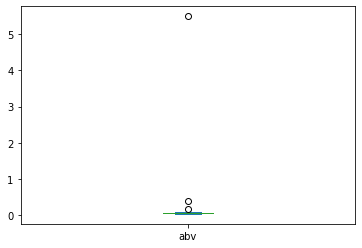

In [2]:
df.plot(kind='box', y='abv')

In [3]:
df['abv'].describe()

count    2190.000000
mean        0.060186
std         0.117010
min         0.032000
25%         0.050000
50%         0.055000
75%         0.065000
max         5.500000
Name: abv, dtype: float64

In [4]:
df['abv'].quantile(0.25)

0.05

In [5]:
df['abv'].quantile(0.75)

0.065

In [6]:
q1 = df['abv'].quantile(0.25)
q3 = df['abv'].quantile(0.75)
iqr = q3 - q1

In [7]:
condition = (df['abv'] < q1 - 1.5 * iqr) | (df['abv'] > q3 + 1.5 * iqr)
df[condition]

,abv,ibu,id,name,style,brewery_id,ounces
963,0.172,NaN,3691,Chamisul Fresh,Soju,993,12.17
1856,0.400,NaN,3012,Grey Goose,Vodka,893,25.26
2250,5.500,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.00


In [8]:
df.loc[2250, 'abv'] = 0.055

In [9]:
df.loc[2250]

abv                             0.055
ibu                              40.0
id                                145
name              Silverback Pale Ale
style         American Pale Ale (APA)
brewery_id                        424
ounces                           12.0
Name: 2250, dtype: object

In [10]:
condition = (df['abv'] < q1 - 1.5 * iqr) | (df['abv'] > q3 + 1.5 * iqr)
df[condition]

,abv,ibu,id,name,style,brewery_id,ounces
963,0.172,NaN,3691,Chamisul Fresh,Soju,993,12.17
1856,0.400,NaN,3012,Grey Goose,Vodka,893,25.26


In [11]:
df[condition].index

Int64Index([963, 1856], dtype='int64')

In [12]:
df.drop(df[condition].index, inplace = True)

In [13]:
condition = (df['abv'] < q1 - 1.5 * iqr) | (df['abv'] > q3 + 1.5 * iqr)
df[condition]

,abv,ibu,id,name,style,brewery_id,ounces


<AxesSubplot:>

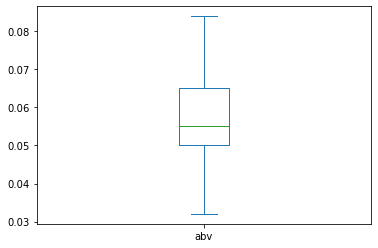

In [15]:
df.plot(kind='box', y= 'abv')